In [3]:
from headers import *

In [4]:
class DMP():
	
	def __init__(self):

		self.alphaz = 25.0
		self.betaz = self.alphaz/4
		self.alpha = self.alphaz/3
		
		self.time_steps = 100
		self.tau = self.time_steps

		self.dimensions = 2
		self.number_kernels = 100
		self.gaussian_kernels = npy.zeros((self.number_kernels,2))

		self.weights = npy.zeros((self.number_kernels, self.dimensions))

		self.demo_pos = npy.zeros((self.time_steps, self.dimensions))
		self.demo_vel = npy.zeros((self.time_steps, self.dimensions))
		self.demo_acc = npy.zeros((self.time_steps, self.dimensions))

		self.target_forces = npy.zeros((self.time_steps, self.dimensions))        
		self.phi = npy.zeros((self.number_kernels, self.time_steps, self.time_steps))
		self.eta = npy.zeros((self.time_steps, self.dimensions))
		self.vector_phase = npy.zeros(self.time_steps)

	def load_trajectory(self,pos,vel,acc):
		self.demo_pos = copy.deepcopy(pos)
		self.demo_vel = copy.deepcopy(vel)
		self.demo_acc = copy.deepcopy(acc)

	def initialize_variables(self):	
		self.weights = npy.zeros((self.number_kernels, self.dimensions))
		self.target_forces = npy.zeros((self.time_steps, self.dimensions))
		self.phi = npy.zeros((self.number_kernels, self.time_steps, self.time_steps))
		self.eta = npy.zeros((self.time_steps, self.dimensions))

		t_range = npy.linspace(0,self.time_steps,self.number_kernels)		
		self.calc_vector_phase(t_range)
		self.gaussian_kernels[:,0] = self.vector_phase
		self.gaussian_kernels[:,1] = self.number_kernels/self.gaussian_kernels[:,0]

	def calc_phase(self,time):
		return npy.exp(-self.alpha*float(time)/self.tau)

	def calc_vector_phase(self,time):
		self.vector_phase = npy.exp(-self.alpha*time.astype(float)/self.tau)		

	def basis(self,index,time):
		return npy.exp(-(self.gaussian_kernels[index,1])*((self.calc_phase(time)-self.gaussian_kernels[index,0])**2))

	def update_target_force(self):
		self.target_forces = self.demo_acc - self.alphaz*(self.betaz*(self.demo_pos[self.time_steps-1]-self.demo_pos)-self.demo_vel)
    
  	def update_target_force_itau(self):
		self.target_forces = (self.tau**2)*self.demo_acc - self.alphaz*(self.betaz*(self.demo_pos[self.time_steps-1]-self.demo_pos)-self.tau*self.demo_vel)
        
  	def update_target_force_dtau(self):
		self.target_forces = self.demo_acc/(self.tau**2) - self.alphaz*(self.betaz*(self.demo_pos[self.time_steps-1]-self.demo_pos)-self.demo_vel/self.tau)    

	def update_phi(self):		
		for i in range(self.number_kernels):
			for t in range(self.time_steps):
				self.phi[i,t,t] = self.basis(i,t)                
                
	def update_eta(self):
		self.eta[:,0] = self.vector_phase*(self.demo_pos[self.time_steps-1,0]-self.demo_pos[0,0])
		self.eta[:,1] = self.vector_phase*(self.demo_pos[self.time_steps-1,1]-self.demo_pos[0,1])

	def learn_DMP(self):		
		self.update_phi()
		self.update_eta()

		for j in range(self.dimensions):
			for i in range(self.number_kernels):
				self.weights[i,j] = npy.dot(self.eta[:,j],npy.dot(self.phi[i],self.target_forces[:,j]))
				self.weights[i,j] /= npy.dot(self.eta[:,j],npy.dot(self.phi[i],self.eta[:,j]))

	def save_DMP_parameters(self,file_suffix):

		with file("force_weights_{0}.npy".format(file_suffix),'w') as outfile:
			npy.save(outfile,self.weights)
	
		with file("position_{0}.npy".format(file_suffix),'w') as outfile:
			npy.save(outfile, self.demo_pos)

	def shebang(self,pos,vel,acc):
		dmp.load_trajectory(pos,vel,acc)
		dmp.initialize_variables()
		dmp.learn_DMP()


In [5]:
dmp = DMP()	
pos = npy.load("position.npy")
vel = npy.load("velocity.npy")
acc = npy.load("acceleration.npy")
dmp.load_trajectory(pos,vel,acc)
dmp.initialize_variables()
# dmp.update_target_force()
dmp.update_target_force_itau()
dmp.learn_DMP()

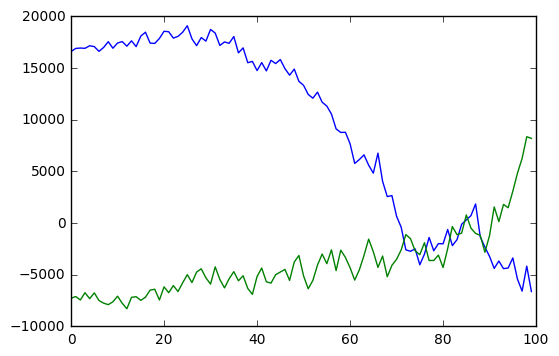

In [6]:
tr = npy.linspace(0,99,100)
plt.plot(tr, dmp.target_forces)
plt.show()

In [7]:
dmp = DMP()	
pos = npy.load("position.npy")
vel = npy.load("velocity.npy")
acc = npy.load("acceleration.npy")
dmp.load_trajectory(pos,vel,acc)
dmp.initialize_variables()
dmp.update_target_force()
# dmp.update_target_force_itau()
dmp.learn_DMP()

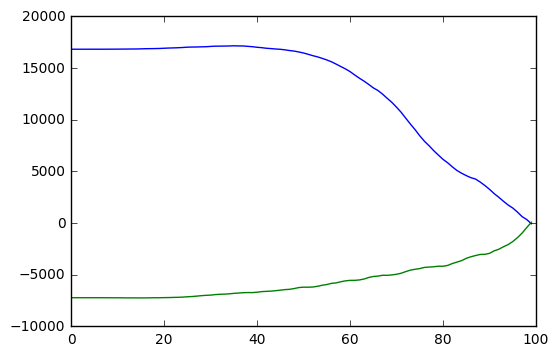

In [14]:
tr = npy.linspace(0,99,100)
plt.plot(tr, dmp.target_forces)
plt.show()

In [39]:
# dmp.target_forces

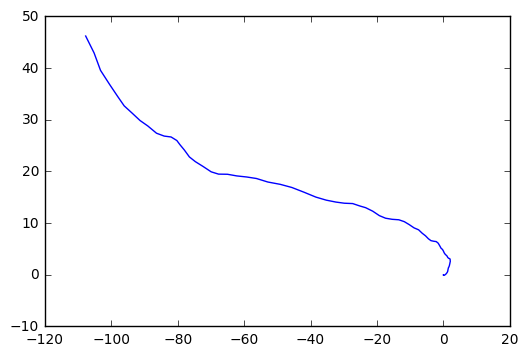

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.53688756e-05,   2.22751456e-05],
       [  1.27862272e-04,  -9.98001683e-05],
       [  4.14015143e-04,   5.26870886e-04],
       [  1.63715130e-03,   9.34617520e-04],
       [  3.88054085e-03,   3.27325309e-03],
       [  4.75604725e-03,   3.85105632e-03],
       [  6.80016000e-03,   5.01064903e-04],
       [  1.52468594e-02,  -8.42341864e-03],
       [  2.26808709e-02,  -1.96088478e-02],
       [  3.62673540e-02,  -2.57104622e-02],
       [  5.74257356e-02,  -3.85112154e-02],
       [  7.67488976e-02,  -6.65288356e-02],
       [  1.05959694e-01,  -8.33607821e-02],
       [  1.29526303e-01,  -9.13783906e-02],
       [  1.76590376e-01,  -1.02656089e-01],
       [  2.50536142e-01,  -1.07354911e-01],
       [  3.09238539e-01,  -8.61011877e-02],
       [  3.59159469e-01,  -4.59479307e-02],
       [  4.22680069e-01,  -3.31876705e-02],
       [  5.23064560e-01,   1.67484526e-02],
       [  6.42964150e-01,   6.20470206e-02],
       [  

In [42]:
# dmp.weights
plt.plot(dmp.demo_pos[:,0],dmp.demo_pos[:,1])
plt.show()
dmp.demo_pos

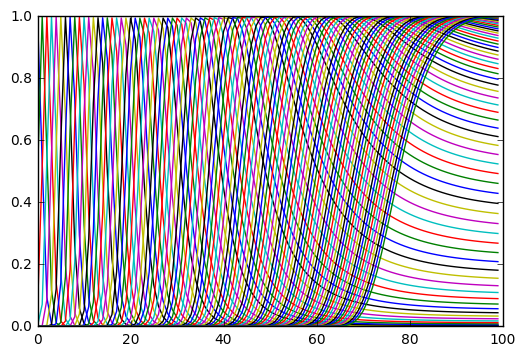

In [16]:
b = npy.zeros((100,100))
for i in range(100):
    for t in range(100):
        b[i,t]=dmp.basis(i,t)
        
    plt.plot(tr,b[i])    

plt.show()

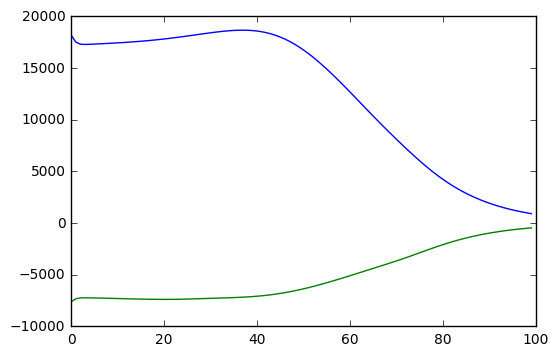

In [45]:
force = npy.zeros((100,2))

for t in range(100):
    den = 0
    for i in range(100):
        force[t] += dmp.weights[i]*dmp.basis(i,t)
        den += dmp.basis(i,t)
    force[t,0]*=-110*dmp.calc_phase(t)/den
    force[t,1]*=46*dmp.calc_phase(t)/den
    
plt.plot(tr,force)
plt.show()